In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
import random

Load Dataset and check datatypes

Dataset was downloaded from Looker on Nov 28.  Selct unformatted and all data in Option pop-up

In [2]:
df = pd.read_csv("ActivityLA2023-11-28T1622.csv")
##  Shorten col names
df.rename(columns = {'Activity Totals Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'Activity Totals Data Entry Date':'Date'}, inplace = True)
df.rename(columns = {'Activity Totals Data Stddev La':'LaSD'}, inplace = True)
df.rename(columns = {'Activity Totals Data Total La':'La'}, inplace = True)
df.rename(columns = {'Activity Totals Data Average Actual LA':'LaAvg1'}, inplace = True)
df.rename(columns = {'Activity Totals Data Avg Actual LA':'LaAvg2'}, inplace = True)
df.rename(columns = {'Activity Totals Data Avg Normalized La':'LaNorm1'}, inplace = True)
df.rename(columns = {'Activity Totals Data La Avg Normalized':'LaNorm2'}, inplace = True)
df.rename(columns = {'Activity Totals Data Count':'Count1'}, inplace = True)
df = df.drop([7848])  ## Final record of non-ascii data
print(df.tail(4))
df= df.sort_values(by=['ID'], ascending=True)
df = df[['ID', 'Date', 'La', 'LaSD', 'LaAvg1', 'LaAvg2','LaNorm1','LaNorm2', 'Count1']]
df['Date'] =pd.to_datetime(df['Date'])  ## convert date object to datetime
print(df.dtypes) ## Show data types

        ID        Date       LaSD        La     LaAvg2     LaNorm1     LaAvg1  \
7844  47.0  2016-01-11  30.871441   9489.69  60.443885  150.979396  60.443885   
7845  47.0  2015-09-08  47.090939  14616.88  91.930063  229.626956  91.930063   
7846  47.0  2015-10-09  29.490892  12829.45  79.686025  199.043259  79.686025   
7847  47.0  2015-07-28  40.180868  15602.13  96.309444  240.565968  96.309444   

      Activity Totals Data Average Actual RA  Count1     LaNorm2  \
7844                               32.442662       1  150.979396   
7845                               71.413742       1  229.626956   
7846                               51.351060       1  199.043259   
7847                               65.540710       1  240.565968   

      Activity Totals Data Total La.1  
7844                          9489.69  
7845                         14616.88  
7846                         12829.45  
7847                         15602.13  
ID                float64
Date       datetime64[ns]
L

Get stats

In [13]:
df.describe()

,ID,La,LaSD,LaAvg1,LaAvg2,LaNorm1,LaNorm2,Count1
count,3717.000000,3677.000000,3677.000000,3717.000000,3677.000000,3677.000000,3717.000000,3717.0
mean,478.901533,32349.023122,85.844900,213.332769,215.653496,538.668791,532.871978,1.0
std,368.829385,24876.628808,62.643793,161.553097,160.881298,401.856385,403.534434,0.0
min,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,217.000000,12751.590000,38.700991,84.137904,86.952656,217.194171,210.163359,1.0
50%,378.000000,25764.520000,70.137482,172.818553,175.083067,437.330188,431.673787,1.0
75%,581.000000,48471.300000,121.575078,321.925269,323.343288,807.661091,804.119103,1.0
max,1422.000000,140471.310000,405.917145,790.465988,790.465988,1974.460724,1974.460724,1.0


Histograms

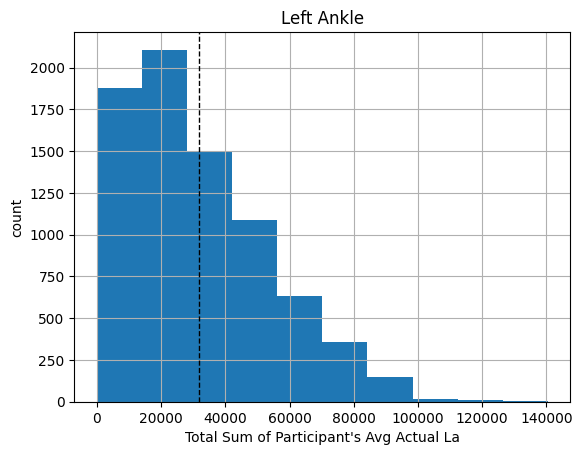

<AxesSubplot: title={'center': 'La Outliers'}, xlabel='ID', ylabel='La'>

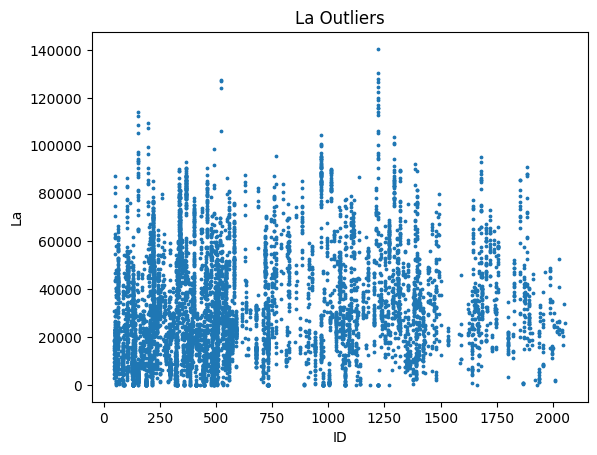

In [4]:
df['La'].hist()  ##Lw values
plt.xlabel("Total Sum of Participant's Avg Actual La")
plt.ylabel("count")
plt.title('Left Ankle')
plt.axvline(df['La'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

df.plot(kind='scatter', x='ID', y='La', s=3, title="La Outliers")

Histograms of Normalized data

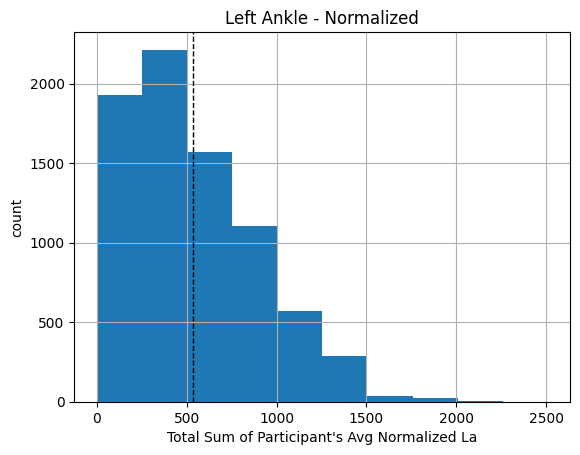

<AxesSubplot: title={'center': 'La Outliers - Normalized'}, xlabel='ID', ylabel='LaNorm1'>

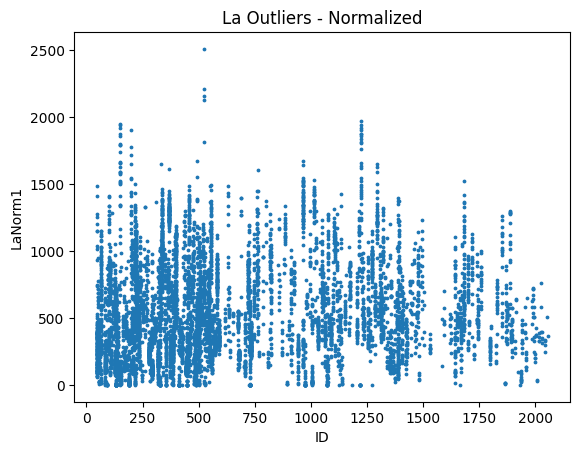

In [5]:
df['LaNorm1'].hist()  ##Activity Totals Data Avg Normalized La
plt.xlabel("Total Sum of Participant's Avg Normalized La")
plt.ylabel("count")
plt.title('Left Ankle - Normalized')
plt.axvline(df['LaNorm1'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()


df.plot(kind='scatter', x='ID', y='LaNorm1', s=3, title="La Outliers - Normalized")

Group by Participant

Count, mean, min, and max values of Left Ankle Normalized by ID
           LaNorm1                         
              mean         min          max
ID                                         
47.0    233.084469   69.085013   518.124931
48.0    566.690870   67.567589  1485.116207
49.0    266.514263   55.448659   531.406559
52.0    398.792334  123.644624   944.785974
53.0    559.843375  352.446794   683.484883
...            ...         ...          ...
2029.0  349.508717  312.769384   394.491491
2043.0  332.625860  329.678868   335.572852
2044.0  270.446144  244.939890   295.952399
2051.0  506.899671  506.899671   506.899671
2056.0  368.284689  368.284689   368.284689

[480 rows x 3 columns]


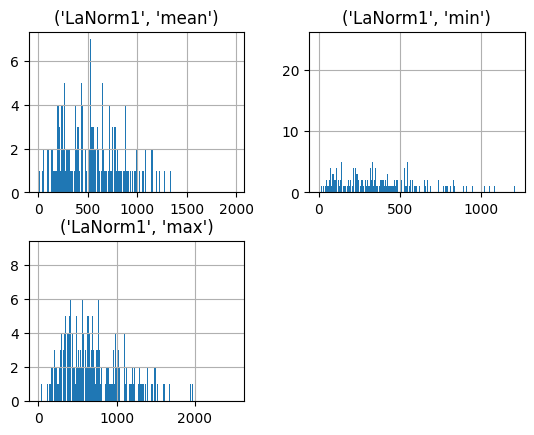

In [6]:
result = df.groupby('ID', sort=True,).agg({'LaNorm1': [ 'mean', 'min', 'max']})
print("Count, mean, min, and max values of Left Ankle Normalized by ID") 
print(result)
result.hist(bins = 480)  #one bin per participant
plt.xlabel("ID")
plt.ylabel("Count")
plt.show()

C:\Users\cliff\AppData\Local\Temp\ipykernel_36504\2010406279.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['ID'], sort = False).sum())


                La         LaSD        LaAvg1        LaAvg2       LaNorm1  \
ID                                                                          
48.0    1022087.93  2677.485034   7486.776080   7486.776078  18700.798707   
49.0    1571581.53  4419.384992  10349.678967  10349.678966  25851.883508   
65.0    3878133.16  9684.075965  26129.501104  26129.501103  65267.417552   
90.0     394812.46  1062.996296   2691.751188   2691.751190   6723.574559   
101.0   1999150.45  4862.074255  13762.967206  13762.967208  34377.745063   
...            ...          ...           ...           ...           ...   
1320.0  2132161.33  5946.389680  13065.977795  13065.977794  32636.774237   
1352.0   449710.70  1496.376564   2981.343746   2981.343745   7446.931586   
1389.0   499111.64  2437.034402   3200.313422   3200.313422   7993.883678   
1395.0  1814725.39  5284.755871  10399.453582  10399.453583  25976.212736   
1422.0   738474.86  2158.925090   4511.831046   4511.831049  11269.850115   

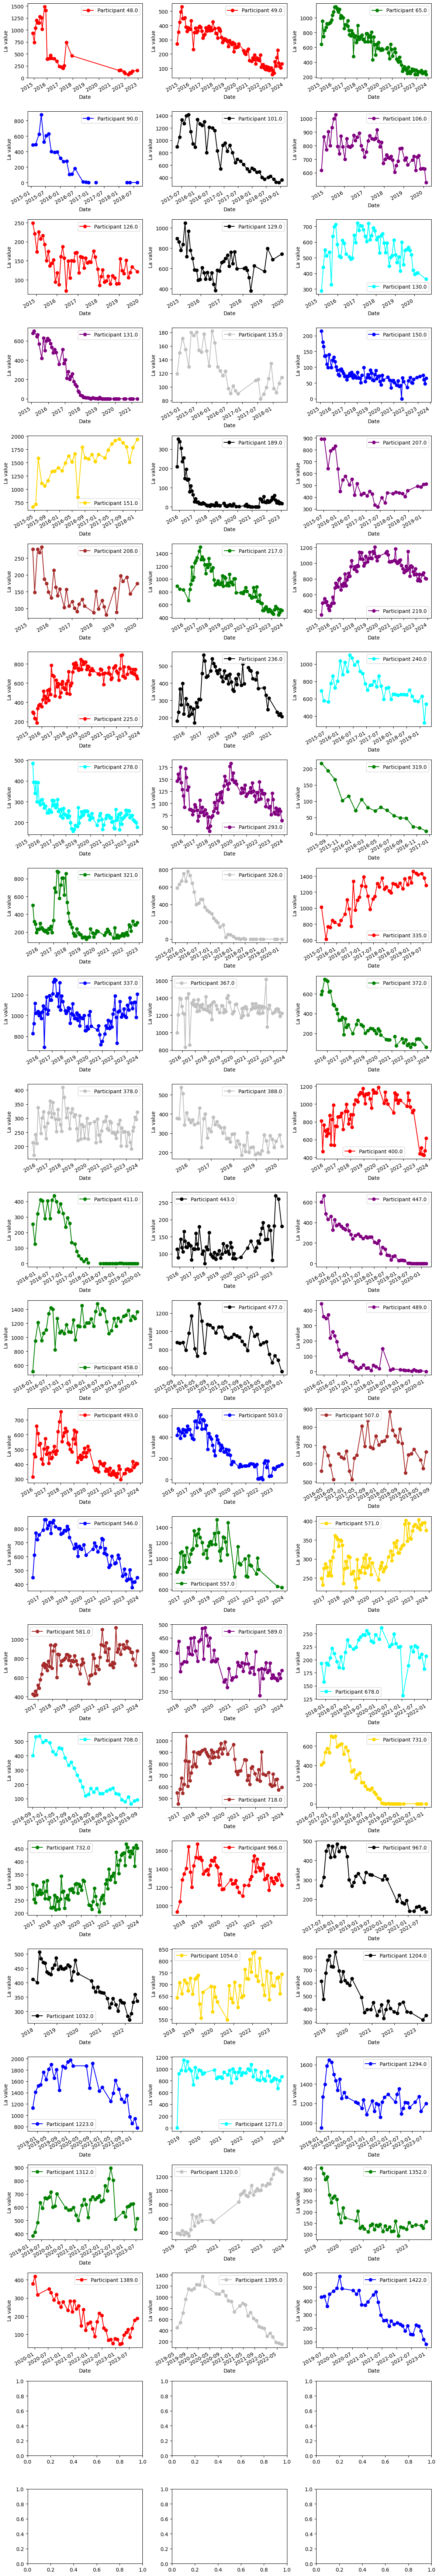

In [7]:
df = df.groupby('ID').filter(lambda x : len(x)>30)  # Reduce data to IDs with six or more activity entries
# print(df.head())
print(df.groupby(['ID'], sort = False).sum())
fig, axs = plt.subplots(figsize=(12, 70), nrows=24, ncols=3)
c = ['purple', 'red', 'green', 'blue', 'black', 'brown', 'gold', 'silver', 'aqua']
for (n, g), ax in zip(df.groupby("ID"), axs.flatten()):
    g.plot(
        x="Date", y="LaNorm1", marker='o',
        xlabel="Date", ylabel="La value",
        label=f"Participant {n}",
        color=c[random.randint(0, 8)],
        ax=ax,
    )
# plt.subplots_adjust(top=0.85)  ##Figure title overlaps figures.  TODO adjust.
# fig.suptitle('Do LaNorm values trend or plateau?', fontsize = 20, color = 'black')
plt.tight_layout()

plt.show()

What is the relationship between La, LaNorm, and LaAvg

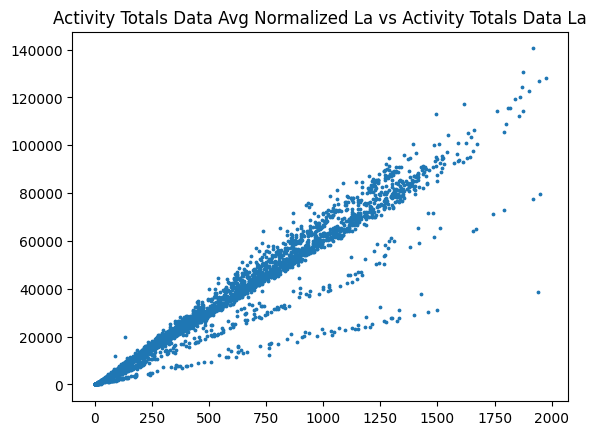

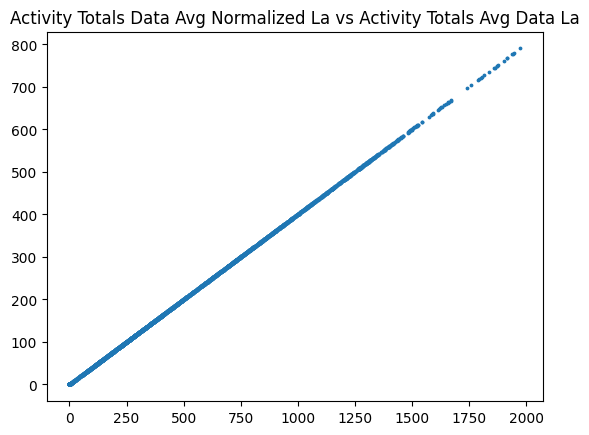

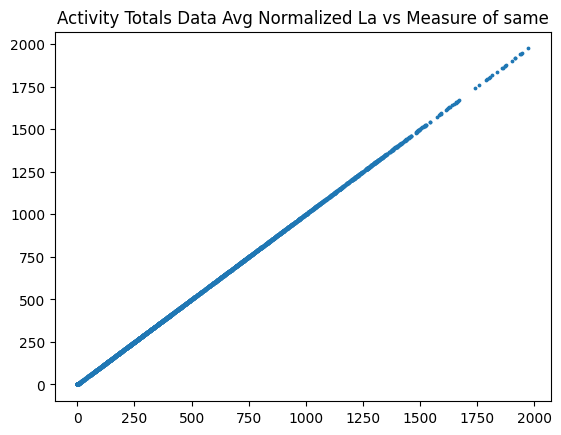

In [8]:
plt.scatter(df["LaNorm1"], df["La"],s=3)
plt.title('Activity Totals Data Avg Normalized La vs Activity Totals Data La')
plt.show()
plt.scatter(df["LaNorm1"], df["LaAvg1"],s=3)
plt.title('Activity Totals Data Avg Normalized La vs Activity Totals Avg Data La')
plt.show()
plt.scatter(df["LaNorm1"], df["LaNorm2"],s=3)
plt.title('Activity Totals Data Avg Normalized La vs Measure of same')
plt.show()

In [9]:
df= df.sort_values(by='Date', ascending=True)
df65 = df.loc[df['ID'] == 65]
df65.describe()

,ID,La,LaSD,LaAvg1,LaAvg2,LaNorm1,LaNorm2,Count1
count,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,65.0,38020.913333,94.941921,256.171579,256.171579,639.876643,639.876643,1.0
std,0.0,14503.093495,25.815194,107.935563,107.935563,269.606199,269.606199,0.0
min,65.0,7229.870000,41.879297,92.983420,92.983420,232.258077,232.258077,1.0
25%,65.0,24964.475000,71.752826,162.552670,162.552670,406.031211,406.031210,1.0
50%,65.0,39902.680000,98.291399,267.009060,267.009060,666.946978,666.946978,1.0
75%,65.0,48006.042500,112.353507,332.947590,332.947590,831.651140,831.651140,1.0
max,65.0,66557.420000,160.620665,459.783125,459.783125,1148.466520,1148.466520,1.0


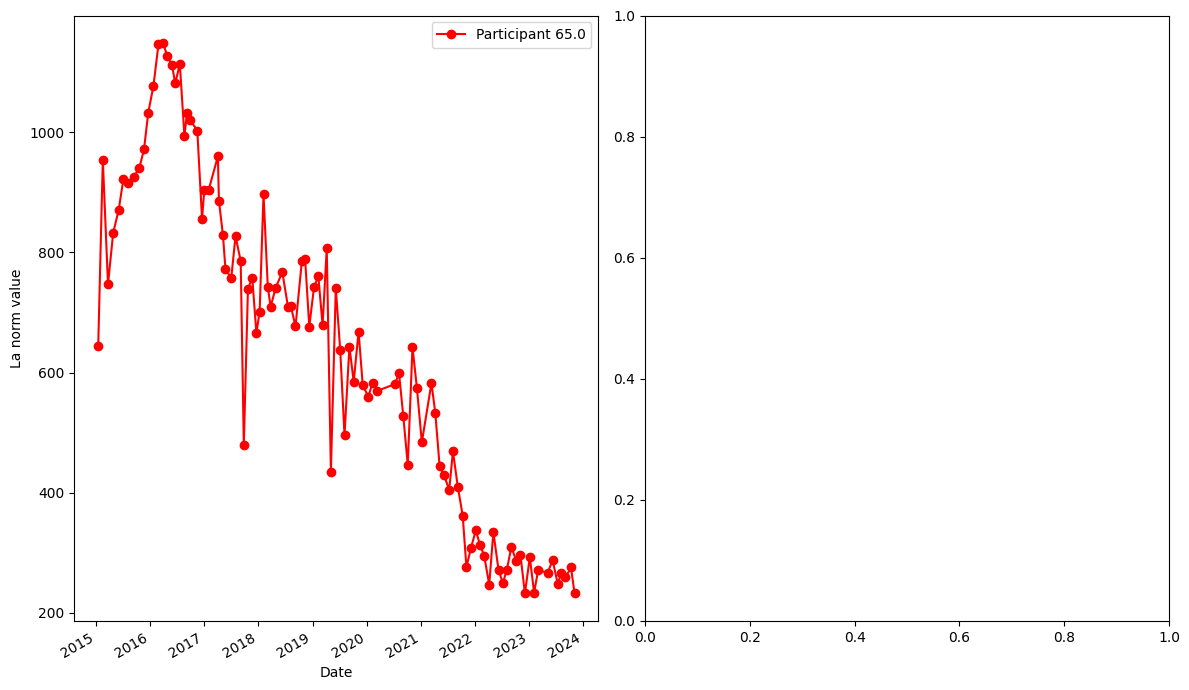

In [10]:
fig, axs = plt.subplots(figsize=(12, 7), nrows=1, ncols=2)
c = ['purple', 'red', 'green', 'blue', 'black', 'brown', 'gold', 'silver', 'aqua']
for (n, g), ax in zip(df65.groupby("ID"), axs.flatten()):
    g.plot(
        x="Date", y="LaNorm1", marker='o',
        xlabel="Date", ylabel="La norm value",
        label=f"Participant {n}",
        color=c[1],
        ax=ax,
    )
# plt.subplots_adjust(top=0.85)  ##Figure title overlaps figures.  TODO adjust.
# fig.suptitle('Do LaNorm values trend or plateau?', fontsize = 20, color = 'black')
plt.tight_layout()

plt.show()